# imports

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Analyse dataset

## load datasets

In [2]:
df_budget = pd.read_csv("budget.csv")
df_contract = pd.read_csv("contract.csv")

In [3]:
df_budget.head()
df_budget.shape[0]

59303

In [4]:
df_contract.head()

,university,specialty,points,status
0,Львівський національний університет імені Іван...,81,189.210,1
1,Університет державної фіскальної служби України,81,134.028,1
2,Національний юридичний університет імені Яросл...,81,187.476,1
3,Університет державної фіскальної служби України,81,178.959,1
4,Національний юридичний університет імені Яросл...,81,186.762,1


## PCA analysis
 - y_b - results related to budget set
 - y_c - results related to contract set
 X because data are the same for both groups

In [5]:
def separate_results_from_data(df):
    data = df.values
    X, y = data[:, :-1], data[:, -1:]
    y = y.astype("int")
    return X, y

X, y_b = separate_results_from_data(df_budget)
_, y_c = separate_results_from_data(df_contract)

In [6]:
def do_one_hot_encoding(X, columns=[0, 1]):
    ct = ColumnTransformer(
        transformers=[
            ("ohe", OneHotEncoder(categories="auto", sparse=False), columns)
        ],
        remainder="passthrough",
        n_jobs=-1
    )
    return ct.fit_transform(X)

X = do_one_hot_encoding(X)

In [7]:
X = StandardScaler().fit_transform(X)

In [8]:
X

array([[-1.16154478e-02, -9.18258547e-03, -8.21308487e-03, ...,
        -8.03062549e-02, -5.40902654e-02,  1.24947915e+00],
       [-1.16154478e-02, -9.18258547e-03, -8.21308487e-03, ...,
        -8.03062549e-02, -5.40902654e-02, -1.43246594e+00],
       [-1.16154478e-02, -9.18258547e-03, -8.21308487e-03, ...,
        -8.03062549e-02, -5.40902654e-02,  1.16520362e+00],
       ...,
       [-1.16154478e-02, -9.18258547e-03, -8.21308487e-03, ...,
        -8.03062549e-02, -5.40902654e-02, -2.45120849e+00],
       [-1.16154478e-02, -9.18258547e-03, -8.21308487e-03, ...,
        -8.03062549e-02, -5.40902654e-02,  3.50783079e-01],
       [-1.16154478e-02, -9.18258547e-03, -8.21308487e-03, ...,
         1.24523302e+01, -5.40902654e-02,  2.67236567e-01]])

In [9]:
pca = PCA(random_state=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=2,
    svd_solver='auto', tol=0.0, whiten=False)

In [10]:
X.shape[1]

655

Number of components that explain 100 percent of variance: 652, explained variance: 1.0000000000000004


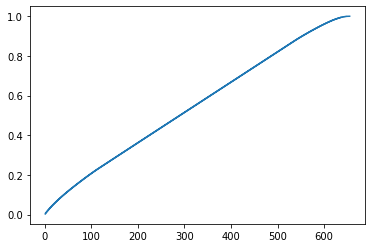

In [13]:
pca.explained_variance_ratio_
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.step(range(1, 656), cumsum[0:655], label="cummulative explained variance")
idx = np.abs(cumsum - 1).argmin()
cumsum[idx]
print(f"Number of components that explain 100 percent of variance: {idx}, explained variance: {cumsum[idx]}")

## Results
 - No dominant components